In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('../raw_data/listings.csv')

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
numeric_col = [
    'neighbourhood_cleansed', 'beds', 'price',
    'availability_365', 'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value','latitude', 'longitude','availability_30',
    'host_is_superhost'
]

data = df[numeric_col]

data.head(5)

,neighbourhood_cleansed,beds,price,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,availability_30,host_is_superhost
0,Islington,NaN,$65.00,361,22,4.86,4.80,4.85,4.80,4.90,4.65,4.75,51.56861,-0.11270,26,f
1,Kensington and Chelsea,1.0,$75.00,4,89,4.79,4.84,4.88,4.87,4.82,4.93,4.73,51.48780,-0.16813,0,f
2,Westminster,3.0,$265.00,295,43,4.69,4.80,4.68,4.66,4.66,4.85,4.59,51.52195,-0.14094,4,f
3,Hammersmith and Fulham,1.0,$150.00,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.47935,-0.19743,29,f
4,Barnet,NaN,$29.00,0,129,4.78,4.70,4.94,4.91,4.89,4.45,4.74,51.57438,-0.21081,0,f


In [5]:
# Create df with specific neighbourhood that has price, occupancy rate and revenue_per month
# Formating Price
data['price'] = data['price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

/tmp/ipykernel_3198/3466053562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].apply(lambda x: x.replace('$', '').replace(',', '')


In [6]:
price_df = data[['neighbourhood_cleansed','price','availability_30', 'availability_365','latitude',	'longitude']]

In [7]:
price_df.groupby('neighbourhood_cleansed').median().sort_values(by='price', ascending=False)

,price,availability_30,availability_365,latitude,longitude
neighbourhood_cleansed,,,,,
City of London,149.0,4.5,112.0,51.513590,-0.090870
Kensington and Chelsea,145.0,0.0,45.0,51.495180,-0.190820
Westminster,140.0,1.0,57.0,51.514980,-0.161790
Camden,100.0,0.0,13.0,51.539940,-0.140090
Hammersmith and Fulham,97.0,0.0,1.0,51.488780,-0.212740
Richmond upon Thames,92.0,0.0,10.0,51.456420,-0.308730
Islington,89.0,0.0,0.0,51.544890,-0.107970
Wandsworth,86.0,0.0,0.0,51.457495,-0.171690
Southwark,82.0,0.0,0.0,51.492000,-0.081840


In [8]:
westminster = price_df[(price_df['neighbourhood_cleansed'] == 'Westminster') & (price_df['price'] > 0)]

In [9]:
westminster.reset_index(inplace=True)

In [23]:
westminster

,index,neighbourhood_cleansed,price,availability_30,availability_365,latitude,longitude
0,2,Westminster,265.0,4,295,51.521950,-0.140940
1,12,Westminster,42.0,0,0,51.526050,-0.199420
2,27,Westminster,125.0,0,0,51.518120,-0.197700
3,33,Westminster,121.0,0,0,51.517570,-0.191950
4,73,Westminster,151.0,0,0,51.518530,-0.183510
...,...,...,...,...,...,...,...
7010,66591,Westminster,200.0,3,40,51.517561,-0.138529
7011,66593,Westminster,105.0,30,90,51.517386,-0.169118
7012,66601,Westminster,901.0,10,11,51.519200,-0.161710
7013,66621,Westminster,418.0,17,352,51.495720,-0.149582


In [10]:
westminster['price'].describe()

count     7015.000000
mean       258.388311
std        566.110740
min         10.000000
25%         83.000000
50%        140.000000
75%        250.000000
max      16696.000000
Name: price, dtype: float64

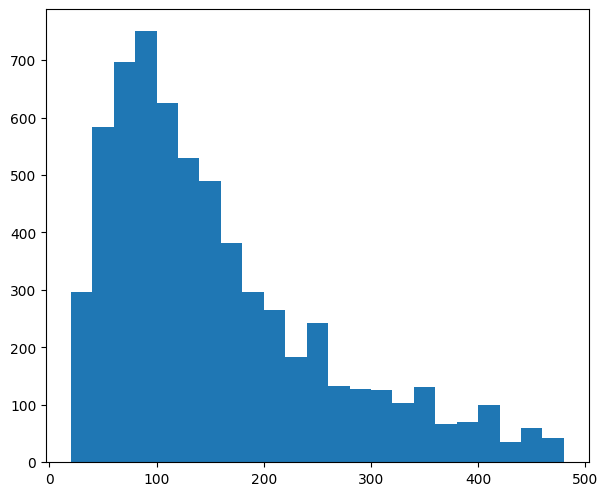

In [11]:
bins_list = range(20,500,20)
plt.subplots(figsize=(7,6), dpi=100)
ax = plt.hist(westminster['price'], bins = bins_list)
#plt.xticks(np.arange(0, 600, 20))

In [12]:
def price_df_plot(neighbourhood):
    data = price_df[(price_df['neighbourhood_cleansed'] == neighbourhood) & (price_df['price'] > 0)]
    min_price = data['price'].describe()['min']
    rd_quadrant = data['price'].describe()['75%'] + 50
    bins_list = range(min_price,rd_quadrant,20)
    plt.subplots(figsize=(7,6), dpi=100)
    ax = plt.hist(data['price'], bins = bins_list)
    return plt.show()

In [13]:
price_df['occupancy_year'] = -((price_df['availability_365']/365) - 1)

/tmp/ipykernel_3198/336078794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['occupancy_year'] = -((price_df['availability_365']/365) - 1)


In [14]:
price_df['days_booked_year'] = 365 - price_df['availability_365']

/tmp/ipykernel_3198/279257281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['days_booked_year'] = 365 - price_df['availability_365']


In [15]:
price_df.drop(columns=['latitude', 'longitude'], inplace =  True)

/tmp/ipykernel_3198/747420987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.drop(columns=['latitude', 'longitude'], inplace =  True)


In [16]:
price_df['pot_rev_annum'] = price_df['price']*price_df['days_booked_year']

/tmp/ipykernel_3198/2794351806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['pot_rev_annum'] = price_df['price']*price_df['days_booked_year']


In [17]:
price_df['days_booked_month'] = 30.50 - price_df['availability_30']
price_df['pot_rev_month'] = price_df['price']*price_df['days_booked_month']

/tmp/ipykernel_3198/616935770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['days_booked_month'] = 30.50 - price_df['availability_30']
/tmp/ipykernel_3198/616935770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['pot_rev_month'] = price_df['price']*price_df['days_booked_month']


In [18]:
price_df

,neighbourhood_cleansed,price,availability_30,availability_365,occupancy_year,days_booked_year,pot_rev_annum,days_booked_month,pot_rev_month
0,Islington,65.0,26,361,0.010959,4,260.0,4.5,292.5
1,Kensington and Chelsea,75.0,0,4,0.989041,361,27075.0,30.5,2287.5
2,Westminster,265.0,4,295,0.191781,70,18550.0,26.5,7022.5
3,Hammersmith and Fulham,150.0,29,364,0.002740,1,150.0,1.5,225.0
4,Barnet,29.0,0,0,1.000000,365,10585.0,30.5,884.5
...,...,...,...,...,...,...,...,...,...
66636,Croydon,120.0,0,253,0.306849,112,13440.0,30.5,3660.0
66637,Ealing,288.0,22,260,0.287671,105,30240.0,8.5,2448.0
66638,Haringey,104.0,13,73,0.800000,292,30368.0,17.5,1820.0
66639,Kensington and Chelsea,402.0,30,365,-0.000000,0,0.0,0.5,201.0


In [24]:
df_west = price_df[(price_df['neighbourhood_cleansed'] == 'Westminster') & (price_df['price'] > 0)]

In [55]:
df_west = df_west[df_west['pot_rev_month'] <=15000]
df_west = df_west[df_west['price'] <=1000]

In [56]:
df_west['pot_rev_month'].describe()

count     6633.000000
mean      3573.904945
std       2908.175715
min         21.500000
25%       1494.500000
50%       2836.500000
75%       4838.000000
max      14914.500000
Name: pot_rev_month, dtype: float64

<AxesSubplot:xlabel='pot_rev_month', ylabel='Count'>

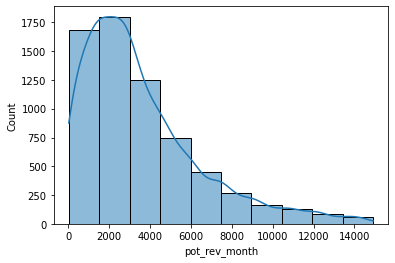

In [57]:
sns.histplot(data=df_west['neighbourhood_cleansed'], x=df_west['pot_rev_month'], bins=10, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

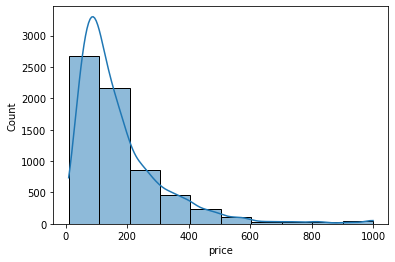

In [60]:
sns.histplot(data=df_west['neighbourhood_cleansed'], x=df_west['price'], bins=10, kde=True)

In [59]:
df_west['price'].describe()

count    6633.000000
mean      176.827529
std       148.816226
min        10.000000
25%        80.000000
50%       130.000000
75%       224.000000
max      1000.000000
Name: price, dtype: float64

In [62]:
price_df.drop(columns=['availability_30','availability_365'], inplace = True)

/tmp/ipykernel_3198/2232078764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df.drop(columns=['availability_30','availability_365'], inplace = True)


In [63]:
price_df

,neighbourhood_cleansed,price,occupancy_year,days_booked_year,pot_rev_annum,days_booked_month,pot_rev_month
0,Islington,65.0,0.010959,4,260.0,4.5,292.5
1,Kensington and Chelsea,75.0,0.989041,361,27075.0,30.5,2287.5
2,Westminster,265.0,0.191781,70,18550.0,26.5,7022.5
3,Hammersmith and Fulham,150.0,0.002740,1,150.0,1.5,225.0
4,Barnet,29.0,1.000000,365,10585.0,30.5,884.5
...,...,...,...,...,...,...,...
66636,Croydon,120.0,0.306849,112,13440.0,30.5,3660.0
66637,Ealing,288.0,0.287671,105,30240.0,8.5,2448.0
66638,Haringey,104.0,0.800000,292,30368.0,17.5,1820.0
66639,Kensington and Chelsea,402.0,-0.000000,0,0.0,0.5,201.0


In [65]:
price_df = price_df[price_df['pot_rev_month'] <=15000]
price_df = price_df[(price_df['price'] <=1000) & (price_df['price'] > 0)]

In [236]:
price_df

,neighbourhood_cleansed,price,occupancy_year,days_booked_year,pot_rev_annum,days_booked_month,pot_rev_month
0,Islington,65.0,0.010959,4,260.0,4.5,292.5
1,Kensington and Chelsea,75.0,0.989041,361,27075.0,30.5,2287.5
2,Westminster,265.0,0.191781,70,18550.0,26.5,7022.5
3,Hammersmith and Fulham,150.0,0.002740,1,150.0,1.5,225.0
4,Barnet,29.0,1.000000,365,10585.0,30.5,884.5
...,...,...,...,...,...,...,...
66636,Croydon,120.0,0.306849,112,13440.0,30.5,3660.0
66637,Ealing,288.0,0.287671,105,30240.0,8.5,2448.0
66638,Haringey,104.0,0.800000,292,30368.0,17.5,1820.0
66639,Kensington and Chelsea,402.0,-0.000000,0,0.0,0.5,201.0


In [69]:
# Final Price and Revenue DF
price_df.to_csv('price.csv')

In [72]:
ratings_df = data.drop(columns=['latitude','longitude','availability_30', 'number_of_reviews', 'availability_365','price','beds'])

In [74]:
ratings_df.isnull().sum()

neighbourhood_cleansed             0
review_scores_rating           18559
review_scores_accuracy         19877
review_scores_cleanliness      19866
review_scores_checkin          19916
review_scores_communication    19880
review_scores_location         19917
review_scores_value            19920
host_is_superhost                 59
dtype: int64

In [75]:
ratings_df.dropna(inplace=True)

In [102]:
ratings_df

,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,review_scores_accuracy_Adj,review_scores_cleanliness_Adj,review_scores_location_Adj,review_scores_communication_Adj,review_scores_value_Adj
0,Islington,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,4.80,4.85,4.65,4.90,4.75
1,Kensington and Chelsea,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,4.84,4.88,4.93,4.82,4.73
2,Westminster,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,4.80,4.68,4.85,4.66,4.59
4,Barnet,4.78,4.70,4.94,4.91,4.89,4.45,4.74,f,4.70,4.94,4.45,4.89,4.74
5,Hounslow,4.55,4.50,4.60,4.70,4.80,4.80,4.30,f,4.50,4.60,4.80,4.80,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66423,Brent,5.00,5.00,5.00,5.00,5.00,4.00,5.00,t,5.00,5.00,4.00,5.00,5.00
66443,Lambeth,2.00,2.00,2.00,2.00,2.00,4.00,4.00,f,2.00,2.00,4.00,2.00,4.00
66515,Hillingdon,1.00,1.00,1.00,1.00,1.00,2.00,1.00,f,1.00,1.00,2.00,1.00,1.00
66517,Kensington and Chelsea,5.00,5.00,5.00,4.00,4.00,4.00,4.00,f,5.00,5.00,4.00,4.00,4.00


<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

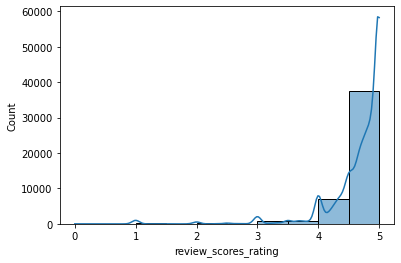

In [78]:
sns.histplot(data=ratings_df['neighbourhood_cleansed'], x=ratings_df['review_scores_rating'], bins=10, kde=True)

In [169]:
labels = ['accuracy', "cleanliness", "location", "communication","value", "checkin"]
points = len(labels)
angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]

In [170]:
labels

['accuracy', 'cleanliness', 'location', 'communication', 'value', 'checkin']

In [173]:
angles.pop()

0.0

In [174]:
angles

[0.0,
 1.0471975511965976,
 2.0943951023931953,
 3.141592653589793,
 4.1887902047863905,
 5.235987755982988]

In [175]:
## Convert all rankings and contiguous data to scale between 0-100
factors = ['review_scores_accuracy', 'review_scores_cleanliness', "review_scores_location", "review_scores_checkin", "review_scores_communication", "review_scores_value"]
new_max = 5
new_min = 0
new_range = new_max - new_min## Create Scaled Columns

for factor in factors:
    max_val = df[factor].max()
    min_val = df[factor].min()
    val_range = max_val - min_val
    ratings_df[factor + '_Adj'] = ratings_df[factor].apply(lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [176]:
ratings_df[ratings_df['neighbourhood_cleansed'] == 'Camden']

,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,review_scores_accuracy_Adj,review_scores_cleanliness_Adj,review_scores_location_Adj,review_scores_communication_Adj,review_scores_value_Adj,review_scores_checkin_Adj
26,Camden,5.00,5.00,5.00,5.00,5.00,5.00,4.00,f,5.00,5.00,5.00,5.00,4.00,5.00
30,Camden,4.79,4.82,4.96,4.89,4.90,4.73,4.77,t,4.82,4.96,4.73,4.90,4.77,4.89
64,Camden,4.75,4.38,3.88,5.00,5.00,5.00,4.75,f,4.38,3.88,5.00,5.00,4.75,5.00
65,Camden,4.84,4.82,4.80,4.83,4.90,4.92,4.64,f,4.82,4.80,4.92,4.90,4.64,4.83
75,Camden,4.71,4.78,4.59,4.85,4.92,4.86,4.71,f,4.78,4.59,4.86,4.92,4.71,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65720,Camden,5.00,5.00,5.00,5.00,5.00,4.00,5.00,f,5.00,5.00,4.00,5.00,5.00,5.00
65731,Camden,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,5.00,5.00,5.00,5.00,5.00,5.00
65737,Camden,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,5.00,5.00,5.00,5.00,5.00,5.00
66092,Camden,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,5.00,5.00,5.00,5.00,5.00,5.00


In [177]:
# Subset scaled columns 
ratings_plot = ratings_df[['review_scores_accuracy_Adj', "review_scores_cleanliness_Adj", "review_scores_location_Adj", "review_scores_communication_Adj", "review_scores_value_Adj", "review_scores_checkin_Adj"]]
ratings_plot.columns = ['accuracy', "cleanliness", "location", "communication", "value", "checkin"]

In [178]:
ratings_plot.reset_index(inplace=True)

In [179]:
ratings_plot.drop(columns=['index'], inplace=True)

/tmp/ipykernel_3198/1672278190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_plot.drop(columns=['index'], inplace=True)


In [180]:
ratings_plot

,accuracy,cleanliness,location,communication,value,checkin
0,4.80,4.85,4.65,4.90,4.75,4.80
1,4.84,4.88,4.93,4.82,4.73,4.87
2,4.80,4.68,4.85,4.66,4.59,4.66
3,4.70,4.94,4.45,4.89,4.74,4.91
4,4.50,4.60,4.80,4.80,4.30,4.70
...,...,...,...,...,...,...
46671,5.00,5.00,4.00,5.00,5.00,5.00
46672,2.00,2.00,4.00,2.00,4.00,2.00
46673,1.00,1.00,2.00,1.00,1.00,1.00
46674,5.00,5.00,4.00,4.00,4.00,4.00


In [188]:
def add_to_star(diamond, color, label=None):
    values = ratings_plot.loc[diamond].tolist()
    values += values[:1]
    values.pop()
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=diamond)
    ax.fill(angles, values, color=color, alpha=0.25)

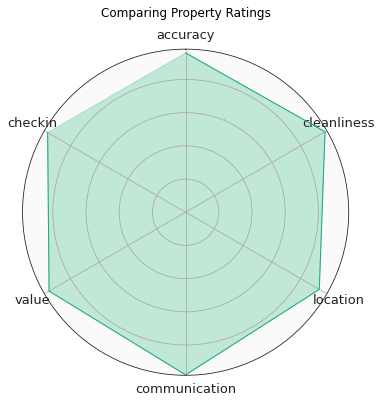

In [211]:
## Create plot object   
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

## Fix axis to star from top
ax.set_theta_offset(np.pi / 2)

ax.set_theta_direction(-1)

# Change the color of the ticks
ax.tick_params(colors='#222222')


ax.tick_params(axis='y', labelsize=0)
# Make the x-axis labels larger or smaller.
ax.tick_params(axis='x', labelsize=13)


# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outer circle
ax.spines['polar'].set_color('#222222')

# Change the circle background color
ax.set_facecolor('#FAFAFA')# Add title and legend
ax.set_title('Comparing Property Ratings', y=1.08)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)


add_to_star(0, '#1aaf6c', "First Property")

In [212]:
# creating function  per neighbourhood to have star

labels = ['accuracy', "cleanliness", "location", "communication","value", "checkin"]
points = len(labels)
angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
angles += angles[:1]
angles.pop()

ratings_plot = ratings_df[['review_scores_accuracy_Adj', "review_scores_cleanliness_Adj", "review_scores_location_Adj", "review_scores_communication_Adj", "review_scores_value_Adj", "review_scores_checkin_Adj"]]
ratings_plot.columns = ['accuracy', "cleanliness", "location", "communication", "value", "checkin"]

,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,review_scores_accuracy_Adj,review_scores_cleanliness_Adj,review_scores_location_Adj,review_scores_communication_Adj,review_scores_value_Adj,review_scores_checkin_Adj
0,Islington,4.86,4.80,4.85,4.80,4.90,4.65,4.75,f,4.80,4.85,4.65,4.90,4.75,4.80
1,Kensington and Chelsea,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,4.84,4.88,4.93,4.82,4.73,4.87
2,Westminster,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,4.80,4.68,4.85,4.66,4.59,4.66
4,Barnet,4.78,4.70,4.94,4.91,4.89,4.45,4.74,f,4.70,4.94,4.45,4.89,4.74,4.91
5,Hounslow,4.55,4.50,4.60,4.70,4.80,4.80,4.30,f,4.50,4.60,4.80,4.80,4.30,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66423,Brent,5.00,5.00,5.00,5.00,5.00,4.00,5.00,t,5.00,5.00,4.00,5.00,5.00,5.00
66443,Lambeth,2.00,2.00,2.00,2.00,2.00,4.00,4.00,f,2.00,2.00,4.00,2.00,4.00,2.00
66515,Hillingdon,1.00,1.00,1.00,1.00,1.00,2.00,1.00,f,1.00,1.00,2.00,1.00,1.00,1.00
66517,Kensington and Chelsea,5.00,5.00,5.00,4.00,4.00,4.00,4.00,f,5.00,5.00,4.00,4.00,4.00,4.00


In [217]:
scores_rating = ratings_df[['neighbourhood_cleansed','review_scores_accuracy_Adj', "review_scores_cleanliness_Adj", "review_scores_location_Adj", "review_scores_communication_Adj", "review_scores_value_Adj", "review_scores_checkin_Adj"]]
scores_rating.columns = ['neighbourhood','accuracy', "cleanliness", "location", "communication", "value", "checkin"]

In [231]:
scores_rating.to_csv('review_scores.csv')

In [221]:
neighbourhood_rating = scores_rating[scores_rating['neighbourhood'] == 'Camden']

In [223]:
neighbourhood_rating = neighbourhood_rating.groupby('neighbourhood').median()

In [227]:
def add_to_star_neighbourhood(neighbourhood, color, label=None):
    values = neighbourhood_rating.loc[neighbourhood].tolist()
    values += values[:1]
    values.pop()
    if label != None:
        ax.plot(angles, values, color=color, linewidth=1, label=label)
    else:
        ax.plot(angles, values, color=color, linewidth=1, label=diamond)
    ax.fill(angles, values, color=color, alpha=0.25)

In [226]:
neighbourhood_rating.loc['Camden'].tolist()

[4.86, 4.75, 4.94, 4.945, 4.7, 4.93]

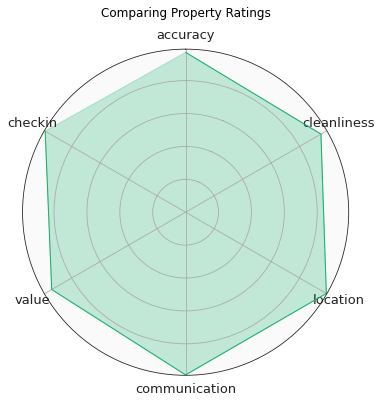

In [229]:
## Create plot object   
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

## Fix axis to star from top
ax.set_theta_offset(np.pi / 2)

ax.set_theta_direction(-1)

# Change the color of the ticks
ax.tick_params(colors='#222222')


ax.tick_params(axis='y', labelsize=0)
# Make the x-axis labels larger or smaller.
ax.tick_params(axis='x', labelsize=13)


# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outer circle
ax.spines['polar'].set_color('#222222')

# Change the circle background color
ax.set_facecolor('#FAFAFA')# Add title and legend
ax.set_title('Comparing Property Ratings', y=1.08)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)


add_to_star_neighbourhood('Camden', '#1aaf6c', "First Property")

# Final Rating Function

In [234]:
def neighbourhood_reviews(neighbourhood):
    labels = ['accuracy', "cleanliness", "location", "communication","value", "checkin"]
    points = len(labels)
    angles = np.linspace(0, 2 * np.pi, points, endpoint=False).tolist()
    angles += angles[:1]
    angles.pop()
    neighbourhood_rating = scores_rating[scores_rating['neighbourhood'] == neighbourhood]
    neighbourhood_rating = neighbourhood_rating.groupby('neighbourhood').median()
    
    def add_to_star_neighbourhood(neighbourhood, color, label=None):
        values = neighbourhood_rating.loc[neighbourhood].tolist()
        values += values[:1]
        values.pop()
        if label != None:
            ax.plot(angles, values, color=color, linewidth=1, label=label)
        else:
            ax.plot(angles, values, color=color, linewidth=1, label=neighbourhood)
        ax.fill(angles, values, color=color, alpha=0.25)

    ## Create plot object   
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ## Fix axis to star from top
    ax.set_theta_offset(np.pi / 2)

    ax.set_theta_direction(-1)

    # Change the color of the ticks
    ax.tick_params(colors='#222222')


    ax.tick_params(axis='y', labelsize=0)
    # Make the x-axis labels larger or smaller.
    ax.tick_params(axis='x', labelsize=13)


    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')

    # Change the color of the outer circle
    ax.spines['polar'].set_color('#222222')

    # Change the circle background color
    ax.set_facecolor('#FAFAFA')# Add title and legend
    ax.set_title('Comparing Property Ratings', y=1.08)

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles), labels)


    return add_to_star_neighbourhood(neighbourhood, '#1aaf6c', "First Property")

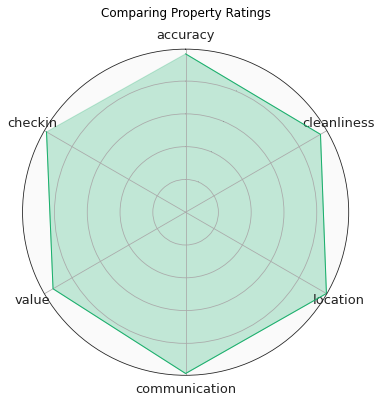

In [235]:
neighbourhood_reviews('Westminster')